# Chap 3. Classification

### 2018년 7월 2일 핸즈온 머신러닝 세미나 자료
#### 금융수학과 201333360 진명훈

## 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

- 한글 폰트 적용

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 1. MNIST

- 고등학생과 미국 인구조사국 직원들이 손으로 쓴 70,000개 작은 숫자 이미지 데이터 셋

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [4]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
print("mnist_data_sample : {} \nmnist_data_feature : {}".format(X.shape[0], X.shape[1]))
print("data_min : {}, data_max : {}".format(mnist["data"].flatten().min(), mnist["data"].flatten().max()))

mnist_data_sample : 70000 
mnist_data_feature : 784
data_min : 0, data_max : 255


In [75]:
from mnist_number_human import *

<2018년 7월 2일 Hands on Machin Learning 세미나 chap.3 mnist 예시 program>

본 프로그램은 mnist dataset의 숫자들을 유저가 알아맞추는 프로그램입니다.
중간에 "0"을 눌러 프로그램을 종료할 수 있습니다.
본 프로그램의 오더에 따라 알맞은 값을 입력해주세요.

1~70000까지의 숫자를 입력하세요 : 56


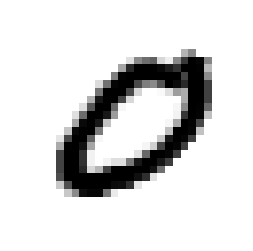

다음 그림의 숫자는 무엇일까요? [0~9] :5
틀렸습니다. 다시 입력하세요
그림을 다시 보시겠습니까? (Y/N) :y


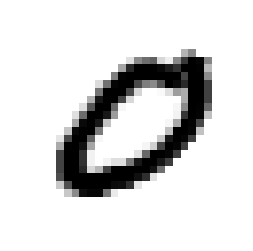

In [ ]:
main()

- train, test 분리

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
# train, data shuffle
shuffle_index = np.random.permutation(60000)

In [11]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 2. 이진 분류기 훈련

- 문제를 단순화하여 숫자 5만 식별하는 분류기를 만들자

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

- gradient descent

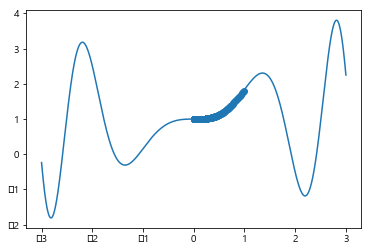

In [14]:
def sin_function(x):
    return x * np.sin(x ** 2) + 1
def derivitive_f(x):
    return np.sin(x**2) + 2 * (x **2) * np.cos(x ** 2)
x1= np.arange(-3,3,0.001)
f_x = sin_function(x1)
x_new = 1
derivative = []
y1 = []
learng_rate= 0.01
for i in range(10000):
    old_value = x_new
    x_new = old_value - learng_rate * derivitive_f(old_value)
    derivative.append(x_new)
    y1.append(sin_function(x_new))
plt.plot(x1, f_x)
plt.scatter(derivative, y1)
plt.show()

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [16]:
some_digit = X[65555]
print("5인가요? : {}".format(sgd_clf.predict([some_digit])[0]))
print("실제 값  : {}".format(int(y[65555])))

5인가요? : True
실제 값  : 5


## 3. 성능 측정

### 3.1. 교차 검증을 사용한 정확도 측정

- 교차 검증 구현

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=5, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("정답률 : {}".format(n_correct / len(y_pred)))

정답률 : 0.9685859511707358
정답률 : 0.9636666666666667
정답률 : 0.9639166666666666
정답률 : 0.9626666666666667
정답률 : 0.9645803816984748


In [18]:
from sklearn.model_selection import cross_val_score
correct_array = cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring = "accuracy")
for i in range(len(correct_array)):
    print("정답률 : {}".format(correct_array[i]))

정답률 : 0.9685859511707358
정답률 : 0.9636666666666667
정답률 : 0.9639166666666666
정답률 : 0.9626666666666667
정답률 : 0.9645803816984748


- 5 아님 class로 분류하는 분류기 생성, 비교 작업 실시

In [19]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [20]:
never_5_clf = Never5Classifier()
correct_array2 = cross_val_score(never_5_clf, X_train, y_train_5, cv=5, scoring="accuracy")
for i in range(len(correct_array)):
    print("정답률 : {}".format(correct_array2[i]))

정답률 : 0.90975
정답률 : 0.9083333333333333
정답률 : 0.91025
정답률 : 0.9080833333333334
정답률 : 0.9118333333333334


#### 정답률이 굉장히 높게 나타나지만 실제로 분류기의 성능이 좋은 것은 아님
#### 분류 문제에서 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유가 위와 같음
#### 5는 mnist의 전체 0~9의 숫자 중 10%에 해당. 불균형한 데이터셋

### 3.2. 오차 행렬

- 분류기의 성능을 평가하는 더 좋은 방법인 Confusion Matrix

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

- sklearn의 cross_val_predict 함수는 cross_val_score와 다르게 테스트 폴드에서 얻은 예측값을 반환

In [22]:
from sklearn.metrics import confusion_matrix
confusion_array = confusion_matrix(y_train_5, y_train_pred)
confu_matrix = pd.DataFrame(confusion_array, columns = ["pred_negative", "pred_positive"], index = ["real_negative", "real_positive"])
confu_matrix

,pred_negative,pred_positive
real_negative,53243,1336
real_positive,986,4435


In [23]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [24]:
TN = confu_matrix.iloc[0,0]
FP = confu_matrix.iloc[0,1]
FN = confu_matrix.iloc[1,0]
TP = confu_matrix.iloc[1,1]

print("             |        <예측>"        )
print("             |  음성         양성"   )
print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
print("        음성 |   TN           FP"    )
print("<실제>       |"                      )
print("        양성 |   FN           TP \n"    )
print(" TN : True Negative\t5가 아니라고 예측(Negative) 정답(True)")
print(" FP : False Positive\t5가 맞다고   예측(Positive) 오답(False)")
print(" FN : False Negative\t5가 아니라고 예측(Negative) 오답(False)")
print(" TP : True Positive\t5가 맞다고   예측(Positive) 정답(True) ")

             |        <예측>
             |  음성         양성
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
        음성 |   TN           FP
<실제>       |
        양성 |   FN           TP 

 TN : True Negative	5가 아니라고 예측(Negative) 정답(True)
 FP : False Positive	5가 맞다고   예측(Positive) 오답(False)
 FN : False Negative	5가 아니라고 예측(Negative) 오답(False)
 TP : True Positive	5가 맞다고   예측(Positive) 정답(True) 


In [25]:
print("정밀도(Precision) = TP / (TP + FP)")
print("재현율(Recall)    = TP / (TP + FN), 민감도(sensitiviy) 혹은 진짜 양성 비율(true positive rate, TPR)이라고도 불림")

정밀도(Precision) = TP / (TP + FP)
재현율(Recall)    = TP / (TP + FN), 민감도(sensitiviy) 혹은 진짜 양성 비율(true positive rate, TPR)이라고도 불림


### 3.3. 정밀도와 재현율

In [26]:
from sklearn.metrics import precision_score, recall_score

print("정밀도 : {}".format(precision_score(y_train_5, y_train_pred)))
print("재현율 : {}".format(recall_score(y_train_5, y_train_pred)))

정밀도 : 0.76849766071738
재현율 : 0.8181147389780483


In [27]:
print("\t               2            2*정밀도*재현율")
print("F1 score =   ------------------- =   --------------")
print("\t          1         1         정밀도+재현율  " )
print("\t       ------  +  ------ ")
print("\t       정밀도     재현율")

# 정밀도는 양성이라고 예측한 것 중에 맞은 것의 갯수를 세는 지표
# 재현율, 민감도는 실제로 양성인 것중에서 예측한 결과가 맞은 것의 갯수를 세는 지표

	               2            2*정밀도*재현율
F1 score =   ------------------- =   --------------
	          1         1         정밀도+재현율  
	       ------  +  ------ 
	       정밀도     재현율


In [28]:
from sklearn.metrics import f1_score
print("F1 Score : {}".format(f1_score(y_train_5, y_train_pred)))

F1 Score : 0.7925303788420299


### 3.4. 정밀도/재현율 트레이드오프

- SGDClassifier는 분류를 실시 할 때 Decision function을 사용하여 sample의 점수를 계싼
- score > threshold 이면 양성, 다른 경우에는 음성으로 할당

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
print("맨 처음 some_digit, 65555번째 번호 (5)의 점수는? : {}".format(y_scores[0]))

맨 처음 some_digit, 65555번째 번호 (5)의 점수는? : 259393.59713490913


In [30]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print("thresh = 0 : {}".format(y_some_digit_pred[0]))

thresh = 0 : True


In [31]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
print("thresh = 200,000 : {}".format(y_some_digit_pred[0]))

thresh = 200,000 : True


- 훈련 set의 모든 샘플의 score 구하기

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, \
                             method="decision_function")

- 모든 임계값에 대한 정밀도, 재현율 계산

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

- 정밀도, 재현율 tradeoff 그래프

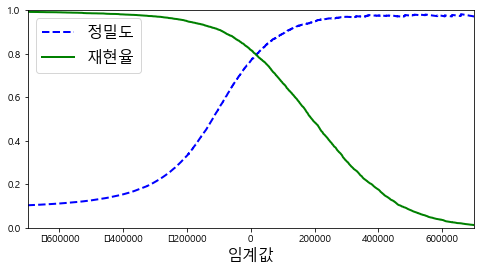

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율", linewidth=2)
    plt.xlabel("임계값", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

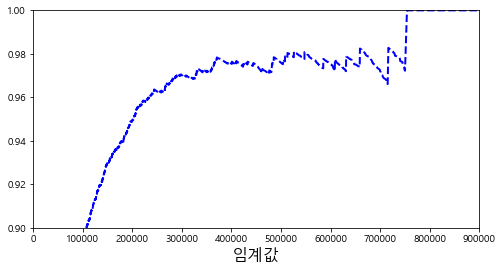

In [35]:
def plot_precision_recall_vs_threshold2(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율", linewidth=2)
    plt.xlabel("임계값", fontsize=16)

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold2(precisions, recalls, thresholds)
plt.xlim([0, 900000])
plt.ylim([0.9, 1])
plt.show()

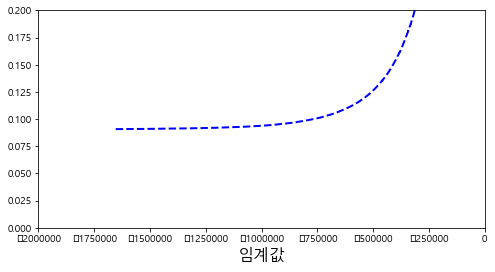

In [36]:
def plot_precision_recall_vs_threshold3(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율", linewidth=2)
    plt.xlabel("임계값", fontsize=16)

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold2(precisions, recalls, thresholds)
plt.xlim([-2000000,0])
plt.ylim([0, 0.2])
plt.show()

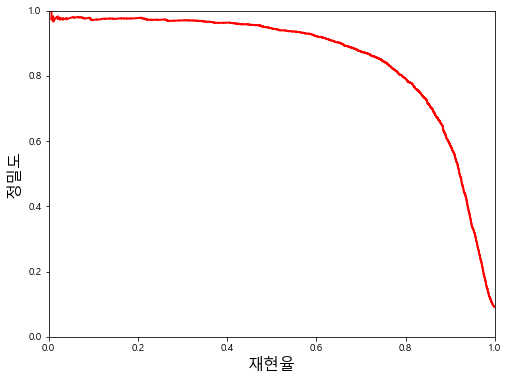

In [37]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "r-", linewidth=2)
    plt.xlabel("재현율", fontsize=16)
    plt.ylabel("정밀도", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

- SGDClassifier의 기본 thresh 값이 0인 것을 확인

In [38]:
(y_train_pred == (y_scores > 0)).all()

True

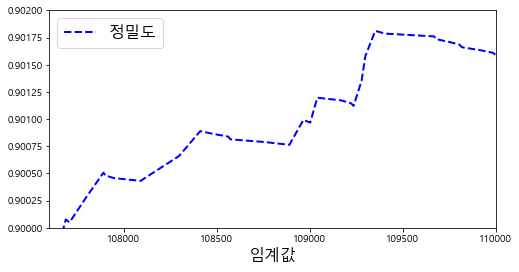

In [42]:
def plot_precision(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도", linewidth=2)
    plt.xlabel("임계값", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision(precisions, recalls, thresholds)
plt.xlim([107600, 110000])
plt.ylim([0.9, 0.902])
plt.show()

In [43]:
y_train_pred_90 = (y_scores > 107700)
print("정밀도 : {}".format(precision_score(y_train_5, y_train_pred_90)))
print("재현율 : {}".format(recall_score(y_train_5, y_train_pred_90)))

정밀도 : 0.900050735667174
재현율 : 0.6544917911824386


### 3.5. ROC 곡선

- 위의 정밀도/재현 곡선과 유사하지만 다름
- 거짓 양성 비율(FPR)에 대한 진짜 양성 비율(TPR)의 곡선

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

- 직선은 랜덤 분류기의 roc.
- utility function을 그어 ROC curve와 만나는 접점이 최적의 점이 될 것

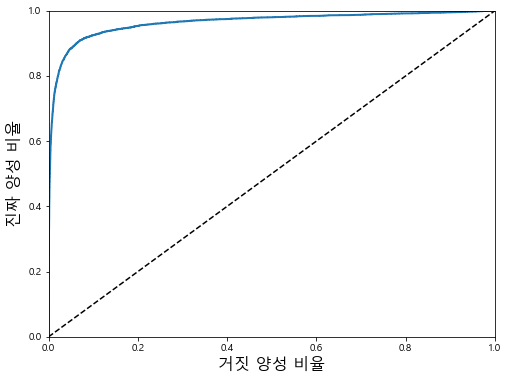

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('거짓 양성 비율', fontsize=16)
    plt.ylabel('진짜 양성 비율', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

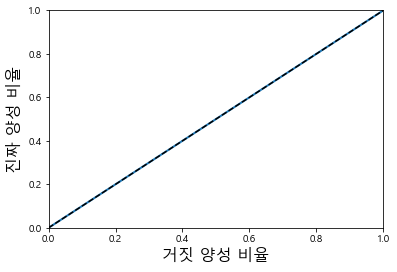

In [46]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

- AUC(Area Under the Curve)를 계산, 다른 분류기와의 성능 비교 가능

In [47]:
# SGDClassifier의 AUC

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9637604724536333

- RandomForest는 Decision Tree 계열의 앙상블 기법으로 SGDClassifier와 작동 방식이 다름
- SGDClassifier는 Decision Function으로 score를 계산
- RandomForestClassifier는 predict_proba()로 샘플이 주어진 클래스에 속할 확률을 계산
- 간단한 해결 방법은 양성 클래스의 확률을 점수로 사용

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [49]:
y_scores_forest = y_probas_forest[:, 1] # 점수는 양상 클래스의 확률입니다
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

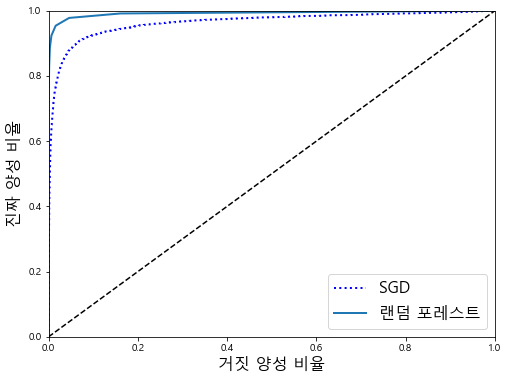

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [51]:
print("SGDClassifier AUC :\t\t{}".format(roc_auc_score(y_train_5, y_scores)))
print("RandomForestClassifier AUC :\t{}".format(roc_auc_score(y_train_5, y_scores_forest)))

SGDClassifier AUC :		0.9637604724536333
RandomForestClassifier AUC :	0.9920583395107354


## 4. 다중 분류

- RandomForest, Naive Bayes 등의 알고즘은 여러 개의 클래스를 직접 처리 가능
- 그러나 SVM, 선형 분류기(SGD Classifier) 등은 이진 분류만 가능
- 위의 문제는 이진 분류기를 여러 개 사용하여 해결 가능

#### OvA(One versus All, One versus rest) 전략
- 특정 숫자 하나만 구분하는 숫자별 이진 분류기 10개를 훈련시켜 클래스가 10개인 숫자 이미지 분류 시스템 구축
- 각 분류기의 결정 점수 중에서 가장 높은 거을 클래스로 선택
- 대부분의 이진 분류 알고리즘에서는 OvA를 선호

In [56]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])
some_digit_scores = sgd_clf.decision_function([some_digit])
print("some_digit의 숫자별 score는?\n")
for i in range(len(some_digit_scores[0])):
    print("{} : {}".format(i, some_digit_scores[0][i]))
print("\n점수가 가장 큰 숫자는? : {}".format(np.argmax(some_digit_scores)))

some_digit의 숫자별 score는?

0 : -176255.6633654333
1 : -525759.5538346214
2 : -723918.807922528
3 : -177704.76954154827
4 : -222967.54648405142
5 : 259393.5971349091
6 : -514552.77767078305
7 : -540311.0327788461
8 : -283450.4574389459
9 : -349773.69393996947

점수가 가장 큰 숫자는? : 5


#### OvO(One versus One) 전략
- 각 숫자의 조합마다 이진 분류기를 훈련
- nC2 개 만큼 분류기 필요
- SVM 같이 훈련 셋의 크기에 민감한 분류기에서 사용

In [57]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
print("예측 값은? : {}".format(int(ovo_clf.predict([some_digit]))))
print("분류기의 갯수는? : {}".format(len(ovo_clf.estimators_)))

예측 값은? : 5
분류기의 갯수는? : 45


In [58]:
forest_clf.fit(X_train, y_train)
print("예측 값은? : {}".format(int(forest_clf.predict([some_digit]))))
print("각 class별 확률은?")
for i in range(10):
    print("{}일 확률 : {}".format(i, forest_clf.predict_proba([some_digit])[0][i]))

예측 값은? : 5
각 class별 확률은?
0일 확률 : 0.0
1일 확률 : 0.0
2일 확률 : 0.0
3일 확률 : 0.0
4일 확률 : 0.0
5일 확률 : 1.0
6일 확률 : 0.0
7일 확률 : 0.0
8일 확률 : 0.0
9일 확률 : 0.0


In [59]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87957409, 0.86034302, 0.87858179])

In [60]:
# input scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90836833, 0.90939547, 0.90903636])

## 5. 에러 분석

실제 프로젝트의 경우
1. 데이터 준비 단계에서 가능한 선택사항을 탐색
2. 여러 모델을 시도
3. 가장 좋은 몇 개 select, GridSearchCV로 하이퍼 파라미터 튜닝
4. 자동화

모델의 성능을 높일 한 가지 방법은 만들어진 에러의 종류를 분석하는 것

In [61]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [62]:
df_conf = pd.DataFrame(conf_mx, columns = range(10))
df_conf.columns.name = "예측"
df_conf.index.name = "실제"

In [63]:
df_conf

예측,0,1,2,3,4,5,6,7,8,9
실제,,,,,,,,,,
0,5738,3,21,10,9,48,43,10,38,3
1,1,6481,46,24,6,44,7,12,109,12
2,60,36,5318,101,88,24,95,55,168,13
3,48,42,144,5317,3,249,38,56,136,98
4,21,29,36,8,5371,10,49,38,76,204
5,72,41,40,180,75,4613,108,27,169,96
6,33,29,51,2,51,91,5601,8,52,0
7,26,20,73,30,48,11,4,5816,16,221
8,52,155,76,157,14,160,52,29,5007,149


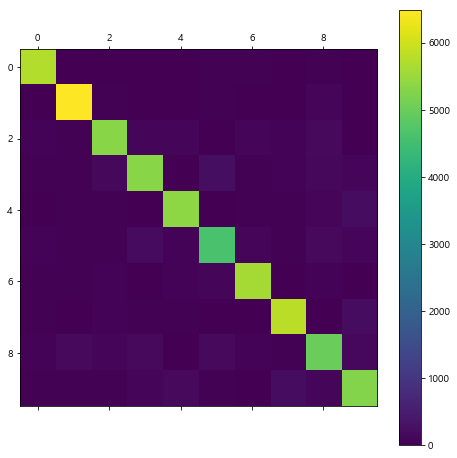

In [64]:
def plot_confusion_matrix(matrix):
    """컬러 오차 행렬을 원할 경우"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
plot_confusion_matrix(conf_mx)
plt.show()

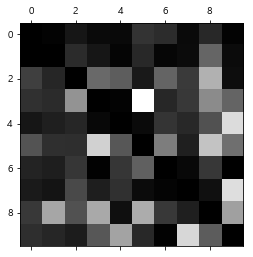

In [65]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [66]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

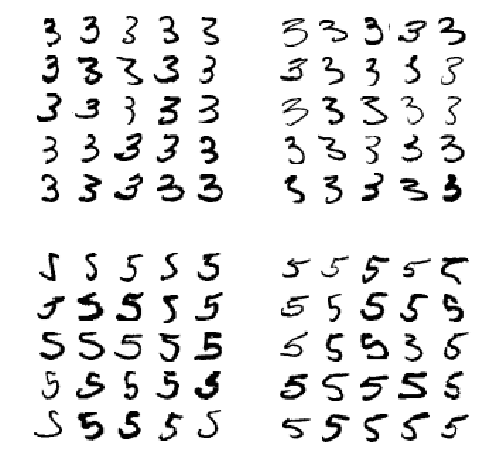

In [67]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

- 위의 그림에서 왼쪽은 3으로 분류된 그림, 오른쪽은 5로 분류된 그림
- 선형 분류기는 클래스마다 픽셀에 가중치를 할당, 새로운 이미지에 대해 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산. 따라서 3과 5는 몇 개의 픽셀만 다르기 때문에 모델이 쉽게 혼동함
- 분류기는 이미지의 위치나 회전 방향에 매우 민감. 3과 5의 에러를 줄이는 한 가지 방법은 이미지를 중앙에 위치시키고 회전되어 있지 않도록 전처리하는 것

## 6. 다중 레이블 분류

이전 까지는 각 샘플이 하나의 클래스에만 할당됨.
그러나 얼굴 인식 분류기와 같은 경우, 한 사진에 여러 사람이 등장한다면 한 샘플에 여러 개의 레이블이 할당되어야 함.

In [68]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [69]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")
# average="weighted"로 설정하면 지지도(타깃 레이블에 속한 샘플 수)를 가중치로 줄 수 있음

## 7. 다중 출력 분류

- multioutput classification
- 이미지에서 노이즈를 제거하는 시스템 구축
- 분류기의 출력이 다중 레이블(픽셀당 한 레이블)
- 각 레이블은 여러 개의 값을 가짐(0~255까지 픽셀 강도)

In [70]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [71]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

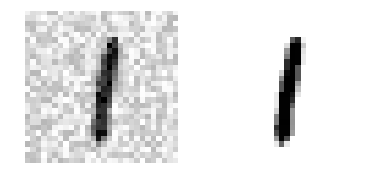

In [72]:
some_index = 1200
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

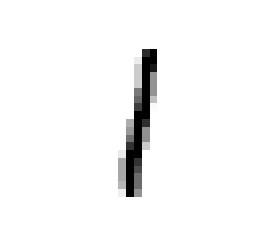

In [73]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)